# CBRN

Metodo delle semirette per il riconoscimento di caratteri numerici manoscritti

In [1]:
# hide output
# %%capture

# load libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow.keras as keraster
import tensorflow as tf
from   keras.datasets import mnist
from   tensorflow.keras.models import Sequential
from   tensorflow.keras.layers import Dense

2023-04-22 18:26:04.637998: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# carica dati mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [23]:
# definisco funzione 'plot_image'
def plot_image(img):
    plt.imshow(img, cmap = 'gray')
    plt.axis('off')

# definisci funzione 'show_image'
def show_image(img):
    plt.figure(figsize=(4,4))
    plot_image(img)
    plt.show(block = False)

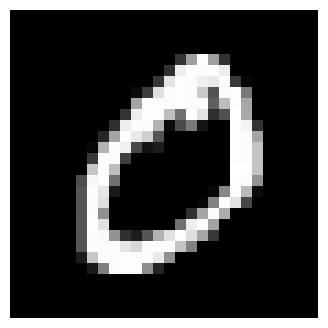

In [4]:
img = x_train[1]
show_image(img)

In [5]:
# trova il centro dell'immagine
def find_center(img):
    # trova i pixel con valore maggiore di 0
    y,x = np.where(img > 0)
    # trova il centro dell'immagine
    center = (int(np.round(np.mean(x),0)), int(np.round(np.mean(y),0)))
    return center

# definisco funzione 'plot_center'
def plot_center(center,color):
    plt.scatter(center[0], center[1], c = color)

(4, 2)


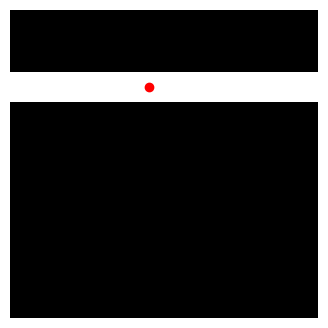

In [6]:
# testo funzione 'find_center'

# build a small image
img = np.zeros((10,10))
img[2, ] = 1

# trova il centro
center = find_center(img)
print(center)

# visualizza l'immagine
plot_image(img)
plot_center(center, 'red')
plt.show()

(1, 2)


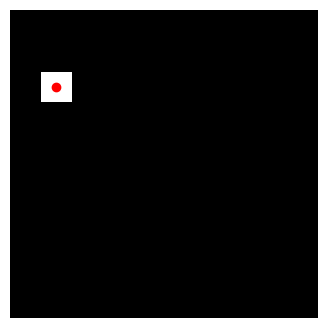

In [7]:
# altro test
img = np.zeros((10,10), dtype = np.uint8)
img[2, 1] = 1

center = find_center(img)
print(center)

# mostro immagine con centro
plot_image(img)
plot_center(center, 'r')
plt.show(block = False)

In [8]:
img = x_train[1]
c = find_center(img)
print("Center of the image: ", c)

Center of the image:  (14, 14)


In [12]:
# crea funzione generate_lines_from (a point)

# input:
# point: coordinate del punto di partenza della retta
# img: immagine
# m: coefficiente angolare della retta

# output:
# x: asse x della retta
# y: asse y della retta

def generate_lines_from(point, img, m):

    # with dell'immagine
    l = len(img)-1

    # rinomino point in c
    c = point

    # determino l'intercetta della retta
    q = c[1]-m*c[0]

    # creo due liste vuote
    x = []
    y = []

    # aggiungo il centro all'array x e y
    x.append(c[0])
    y.append(c[1])

    # while y[-1] < 27 e contemporaneamente x[-1] < 27
    while y[-1] < l and x[-1] <= l:
        x.append(x[-1]+1)
        y.append(m*x[-1]+q)

    # se x[-1] > 27 o y[-1] > 27 allora elimina l'ultimo elemento di x e y
    if x[-1] > l or y[-1] > l:
        x.pop()
        y.pop()

    return x, y

In [22]:
# invoco funzione generate_lines_from
x, y = generate_lines_from(c, img, 1)

# visualizzo array
print("x:", x)
print("y:", y)

x: [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
y: [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]


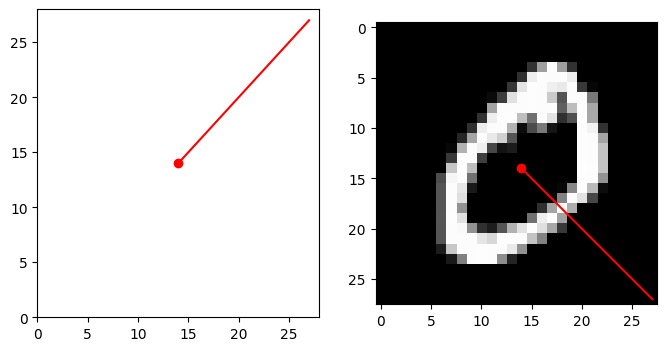

In [27]:
# plotto
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(x, y, color = 'red')
# plotta il centro dell'immagine
plot_center(c, 'red')
# set axis limits to 0, 28
plt.xlim(0, 28)
plt.ylim(0, 28)
plt.subplot(1,2,2)
# plot image
plt.imshow(img, cmap = 'gray')
# plotta x e y sull'immagine
plt.plot(x, y, color = 'red')
# plotta il centro dell'immagine
plot_center(c, 'red')
# plt.axis('off')
plt.show(block = False)

In [28]:
# salvare i valori dei pixel sulla retta individuata dai punti x,y in un array 
def get_pixel_values(img, x, y):
    # inizializza l'array a 0 casta i valori di pixel in interi
    values = np.zeros(len(x))
    for i in range(len(x)):
        values[i] = img[x[i], np.round(y[i]).astype(int)]
    return values.astype(int)

In [29]:
# testo funzione get_pixel_values
pixels = get_pixel_values(img, x, y)
print("pixels:", pixels)


pixels: [  0   0   0   7 252   0   0   0   0   0   0   0   0   0]


In [33]:
# testo funzione generate_lines_from, find_center e get_pixel_values insieme

# carica immagine
img = x_train[1]

# trova il centro dell'immagine
c = find_center(img)
print("Il centro ha coordinate:", c)

# genera retta invocando generate_lines_from
x, y = generate_lines_from(c, img, 1.2)

# visualizzo vettori
print("\nI punti che indiiduano la retta sono:")
print("x:",x)
print("y:",y,"\n")

# ottieni i valori dei pixel sulla retta
pixels = get_pixel_values(img, x, y)

print("I valori dei pixel sulla retta y = x sono:")
print(pixels)

Il centro ha coordinate: (14, 14)

I punti che indiiduano la retta sono:
x: [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
y: [14, 15.2, 16.4, 17.599999999999998, 18.799999999999997, 20.0, 21.2, 22.4, 23.599999999999998, 24.799999999999997, 25.999999999999996] 

I valori dei pixel sulla retta y = x sono:
[  0   0   0 131 173   0   0   0   0   0   0]


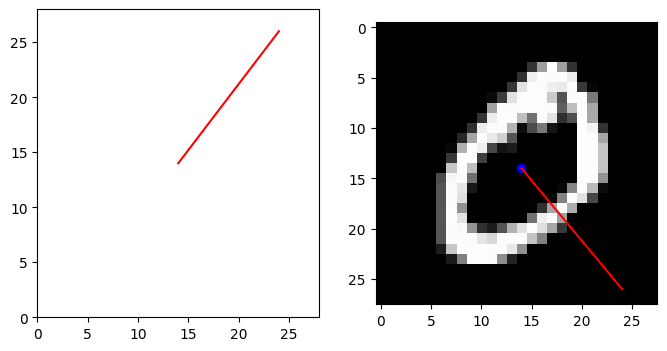

In [36]:
# plotto
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(x, y, color = 'red')
# set axis limits to 0, 28
plt.xlim(0, 28)
plt.ylim(0, 28)
plt.subplot(1,2,2)
# plotta x e y sull'immagine
plt.imshow(img, cmap = 'gray')
plt.plot(x, y, color = 'red')
# plotta il centro dell'immagine
plt.scatter(c[0], c[1], color = 'blue')
plt.show(block = False)

### Ricerca delle intersezioni
Algoritmo che cerca le intersezioni: `find_intersections` è una funzione che data un'immagine e una retta è in grado di determinare le coordinate delle intersezioni con il carattere numerico manoscritto e la distanza dal centro.

L'idea, in pseudo code, è la seguente
```
check del primo pixel

pixel[0] è il primo pixel
    se pixel[0] è acceso
        se pixel[1] è acceso
            allora coordinate di pixel[0] sono coordinate_min
        altrimenti (primo pixel acceso, secondo è spento)
            allora coordinate di pixel[0] costituiscono intersezione singola. 
            calc distanza tra centro e coordinate interesezione singola
    altrimenti (pixel[0] spento)
        non succede nulla

per i che vanno da 1 a len(pixel)-1
    se i è acceso
        se i+1 è acceso
            (inutile) se i-1 è acceso
                (inutile) allora non fare nulla
            se i-1 è spento
                allora coordinate di pixel[i] sono coordinate_min
        altrimenti (i acceso, i+1 spento)
            se i-1 spento
                allora coordinate di pixel[i] sono singola intersezione
                calcola distanza senza media
            altrimenti(i acceso, i+1 spento, i-1 acceso)
                allora coordinate di pixel[i] sono coordinate max
                calcola media tra coordinate min e max
                calcola distanza tra media
                clear variables coordinate_min e coordinate_max

check dell'ultimo pixel

end = len(pixel)
end = end -1

se pixel[end] è acceso
    se pixel[end-1] è acceso
        allora le coordinate di pixel[end] sono coordinate_max
        calcola media
        calcola distanza tra centro e coordinate medie
    altrimenti (pixel fine acceso, pixel precedente spento)
        allora le coordinate di pixel[end] sono intersezione singola
```

In [37]:
# definisco funzione per calcolare distanza tra due punti
def calcola_distanza(punto_inizio, punto_fine):
    distanza = np.sqrt((punto_inizio[0] - punto_fine[0])**2 + (punto_inizio[1] - punto_fine[1])**2)
    np.round(distanza, 2)
    return distanza

In [38]:
# definisco funzione per trovare le intersezioni tra i caratteri manoscritti di un'immagine img e una retta di punti x e y
def find_intersections(img, x, y, soglia):
    
    # ottengo i valori dei pixel sulla retta
    pixel = get_pixel_values(img, x, y)
    
    # calcolo lunghezza vettore pixel
    l = len(x)
    
    # crea array vuoto per salvare le coordinate delle intersezioni
    coordinate_intersezioni = []
    
    # crea array vuoto per salvare la distanza tra il centro dell'immagine e le intersezioni
    distanze = []
    
    # analizza primo pixel sulla retta
    if pixel[0]>=soglia:
        if pixel[1]>=soglia:
            coordinate_min = x[0], y[0]
        else:
            coordinate_singola_intersezione = x[i], y[i]
            coordinate_intersezioni.append(coordinate_singola_intersezione)
            distanza = calcola_distanza(c,coordinate_singola_intersezione)
            distanze.append(distanza)
    
    for i in range(1, l):
        # se l'iesimo pixel è acceso
        if pixel[i] >= soglia:
            if pixel[i+1] >= soglia:
                if pixel[i-1] < soglia:
                    coordinate_min = x[i], y[i]
            else:
                if pixel[i-1] < soglia:
                    coordinate_singola_intersezione = x[i], y[i]
                    coordinate_intersezioni.append(coordinate_singola_intersezione)
                    distanza = calcola_distanza(c,coordinate_singola_intersezione)
                    distanze.append(distanza)
                else:
                    coordinate_max = x[i], y[i]
                    
                    # calcola media tra coordinate_min e coordinate_max
                    coordinate_media = [(coordinate_min[0] + coordinate_max[0])/2, (coordinate_min[1] + coordinate_max[1])/2]
                    
                    distanza = calcola_distanza(coordinate_media,c)
                    distanze.append(distanza)
                    
                    # approssimo a 0 cifre decimali e salvo in array coordinate intersezioni
                    coordinate_media[0] = np.round(coordinate_media[0],0)
                    coordinate_media[1] = np.round(coordinate_media[1],0)
                    coordinate_intersezioni.append(coordinate_media)
                    
    
    # analizza ultimo pixel che è pixel[l-1]
    if pixel[l-1] >= soglia:
        if pixel[l-2] >= soglia:
            coordinate_max = x[l-1], y[l-1]
                    
            # calcola media tra coordinate_min e coordinate_max
            coordinate_media = [(coordinate_min[0] + coordinate_max[0])/2, (coordinate_min[1] + coordinate_max[1])/2]

            distanza = calcola_distanza(coordinate_media,c)
            distanze.append(distanza)

            # approssimo a 0 cifre decimali e salvo in array coordinate intersezioni
            coordinate_media[0] = np.round(coordinate_media[0],0)
            coordinate_media[1] = np.round(coordinate_media[1],0)
            coordinate_intersezioni.append(coordinate_media)
        else:
            coordinate_singola_intersezione = x[i], y[i]
            coordinate_intersezioni.append(coordinate_singola_intersezione)
            distanza = calcola_distanza(c,coordinate_singola_intersezione)
            distanze.append(distanza)
    
    return coordinate_intersezioni, distanze

# da invocare come 
# coordinate_intersezioni, distanze = find_intersections(img, x, y)

In [39]:
# definisci funzione che plotta le intersezioni
def plot_intersections(coordinate_intersezioni, color):
    for i in range(len(coordinate_intersezioni)):
        plt.scatter(coordinate_intersezioni[i][0], coordinate_intersezioni[i][1], color = color)

# non so se la sintassi corretta sia
# plt.scatter(coordinate_intersezioni[i][1], coordinate_intersezioni[i][0], color = color)
# oppure
# plt.scatter(coordinate_intersezioni[i][0], coordinate_intersezioni[i][1], color = color)

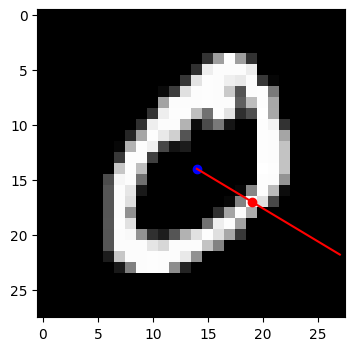

Le distanze sono:  [5.830951894845301]


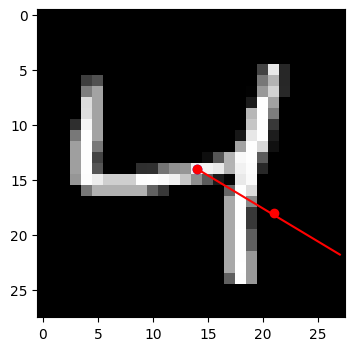

Le distanze sono:  [0.5830951894845304, 8.16333265278342]


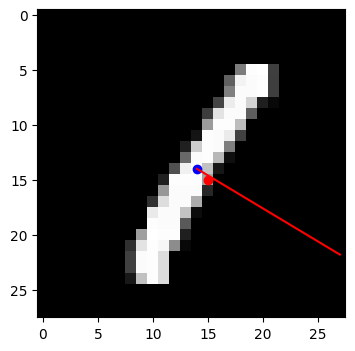

Le distanze sono:  [1.16619037896906]


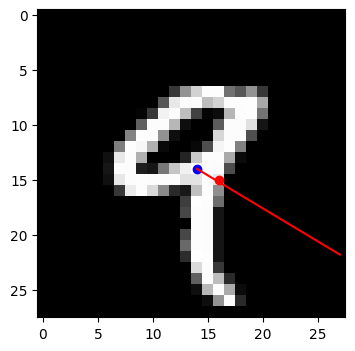

Le distanze sono:  [2.33238075793812]


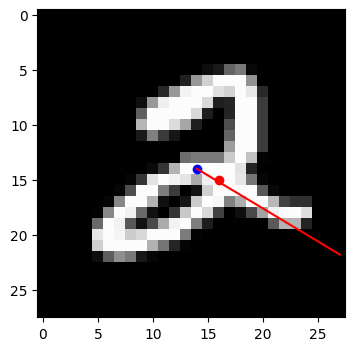

Le distanze sono:  [2.33238075793812]


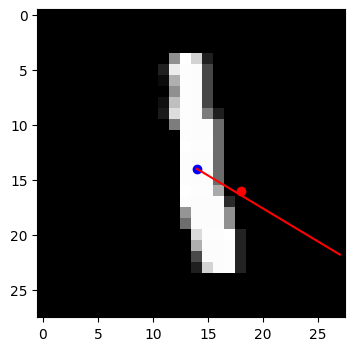

Le distanze sono:  [4.081666326391711]


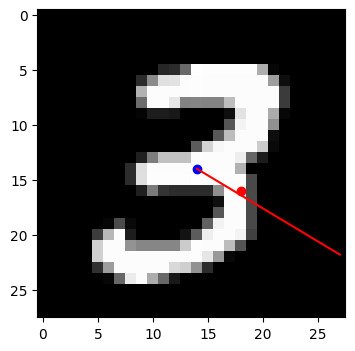

Le distanze sono:  [4.081666326391711]


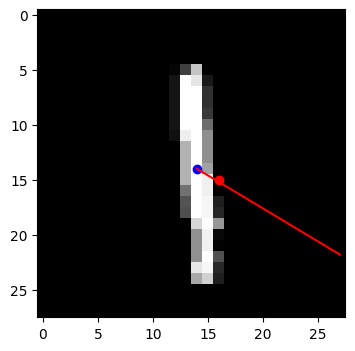

Le distanze sono:  [2.33238075793812]


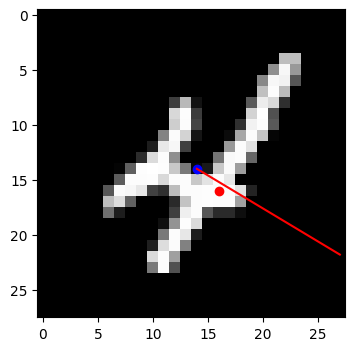

Le distanze sono:  [2.9154759474226504]


In [40]:
# quindi basterà fare

for i in range(1,10):
    img = x_train[i]
    
    # calcola centro
    c = find_center(img)
    
    x, y = generate_lines_from(c, img, m = 0.6)
    coordinate_intersezioni, distanze = find_intersections(img, x, y, soglia = 10)
    
    # plotta i punti di intersezione sull'immagine insieme alla semiretta (sovrapposta)
    plt.figure(figsize=(4,4))
    plt.imshow(img, cmap = 'gray')
    plt.plot(x, y, color = 'red')
    plot_center(c, 'blue')
    plot_intersections(coordinate_intersezioni, 'red')
    plt.show()

    print("Le distanze sono: ", distanze)


bisogna rivedere:
- funzione get pixel values sulla retta
- find_intersection

perchè il coefficiente angolare 1 in realtà è flippato?

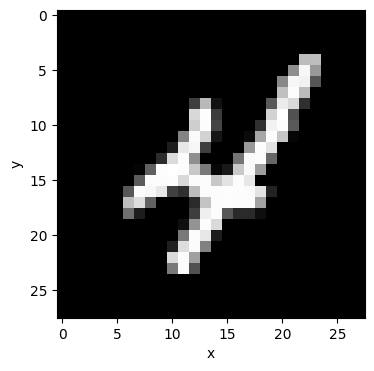

In [178]:
# plotto img con assi x e y chiamati 'x' e 'y'
plt.figure(figsize=(4,4))
plt.imshow(img, cmap = 'gray')
plt.axis('on')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

ecco perchè! l'asse y è rivolto verso il basso. Cosa implica questa osservazione?

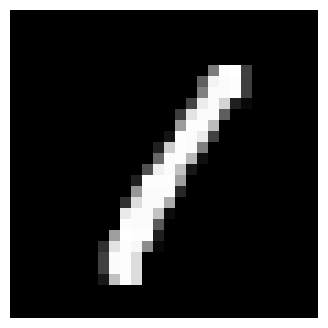

Coordinate centro: (14, 14)
x: [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
y: [14, 14.6, 15.2, 15.799999999999999, 16.4, 17.0, 17.6, 18.2, 18.799999999999997, 19.4, 20.0, 20.6, 21.2, 21.799999999999997] 

i valori dei pixel sulla retta sono:
[251 159  39   0   0   0   0   0   0   0   0   0   0   0] 

coordinate:
[[15.0, 15.0]]

distanze:
[1.16619037896906]


In [42]:
# test su singola immagine per capire cosa non funziona
img = x_train[3]
show_image(img)

c = find_center(img)
print("Coordinate centro:", c)

x, y = generate_lines_from(c, img, m = 0.6)
print("x:",x)
print("y:",y,"\n")

pixel = get_pixel_values(img, x, y)
coordinate, distanze = find_intersections(img,x,y, soglia = 2)

print("i valori dei pixel sulla retta sono:")
print(pixel,"\n")

print("coordinate:")
print(coordinate)

print("\ndistanze:")
print(distanze)